In [41]:
import numpy as np
import pandas as pd
from pymongo import MongoClient
import base64
import io
from PIL import Image
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
SERVER_IP = "213.136.94.240"
USERNAME = "admin"
PASSWORD = "04061997"

client = MongoClient(host=SERVER_IP, username=USERNAME, password=PASSWORD)

In [3]:
db = client.instagramAuditor

In [4]:
profiles = db.profiles

In [5]:
import timeit

start = timeit.default_timer()
#full_test_profiles = list(profiles.find({}).limit(3))
profiles_data = list(profiles.find({}, {"id": 1, "username": 1, "fullname":1,"biography":1,
                                   "followedby":1,"follow":1,"isbusinessaccount":1,
                                   "isjoinedrecently":1,"businesscategoryname":1,"categoryid":1,
                                  "isprivate":1,"isverified":1,"connectedfbpage":1,
                                  "postscount":1}).limit(65000))
#est. 6800 sec
stop = timeit.default_timer()

print('Time: ', stop - start)  


Time:  59.382131202


In [14]:
df.dtypes

_id                     object
id                      object
username                object
fullname                object
biography               object
followedby               int64
follow                   int64
isbusinessaccount         bool
isjoinedrecently          bool
businesscategoryname    object
categoryid              object
isprivate                 bool
isverified                bool
connectedfbpage           bool
postscount               int64
dtype: object

In [6]:
X = profiles_data.copy()
df = pd.DataFrame(X) 
profiles_subset = df.copy()
embeddings_len = 512

In [9]:
df.describe()
df.columns

,followedby,follow,postscount
count,6.500000e+04,65000.000000,65000.000000
mean,2.609873e+03,483.317754,362.600169
std,1.048457e+05,870.182484,960.178577
min,0.000000e+00,0.000000,0.000000
25%,1.400000e+02,109.000000,42.000000
50%,3.640000e+02,243.000000,132.000000
75%,8.470000e+02,481.000000,390.000000
max,2.626624e+07,7520.000000,103802.000000


Index(['_id', 'id', 'username', 'fullname', 'biography', 'followedby',
       'follow', 'isbusinessaccount', 'isjoinedrecently',
       'businesscategoryname', 'categoryid', 'isprivate', 'isverified',
       'connectedfbpage', 'postscount'],
      dtype='object')

In [10]:
categorical_fields = [
    'isbusinessaccount',
    'isprivate',
    'isverified',
    'connectedfbpage',
    'isjoinedrecently'
]
int_fields = [
    'followedby',
    'follow',
    'postscount'
]

In [11]:
df[categorical_fields].astype(int).describe()
meanful_categorical_fields = ['isbusinessaccount','isprivate','isverified']

,isbusinessaccount,isprivate,isverified,connectedfbpage,isjoinedrecently
count,65000.000000,65000.000000,65000.000000,65000.0,65000.0
mean,0.431646,0.048815,0.000723,0.0,0.0
std,0.495310,0.215484,0.026881,0.0,0.0
min,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,1.000000,0.0,0.0


In [59]:
#df[meanful_categorical_fields].astype(int)
df_pie = pd.DataFrame({},columns=meanful_categorical_fields)

def binary_to_readable_name(word):
    return f"is {word[2:]}"

stat = dict()
for binary in meanful_categorical_fields:
    counts = df[binary].value_counts()
    stat[binary_to_readable_name(binary)] = list(counts)

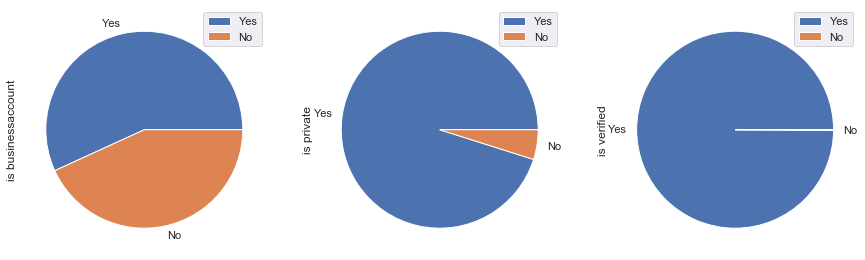

In [64]:
pie_data = pd.DataFrame(stat,
                  index=['Yes', 'No'])

plot = pie_data.plot.pie(subplots=True, figsize=(15, 20))
plt.savefig('pie.png',dpi=400)

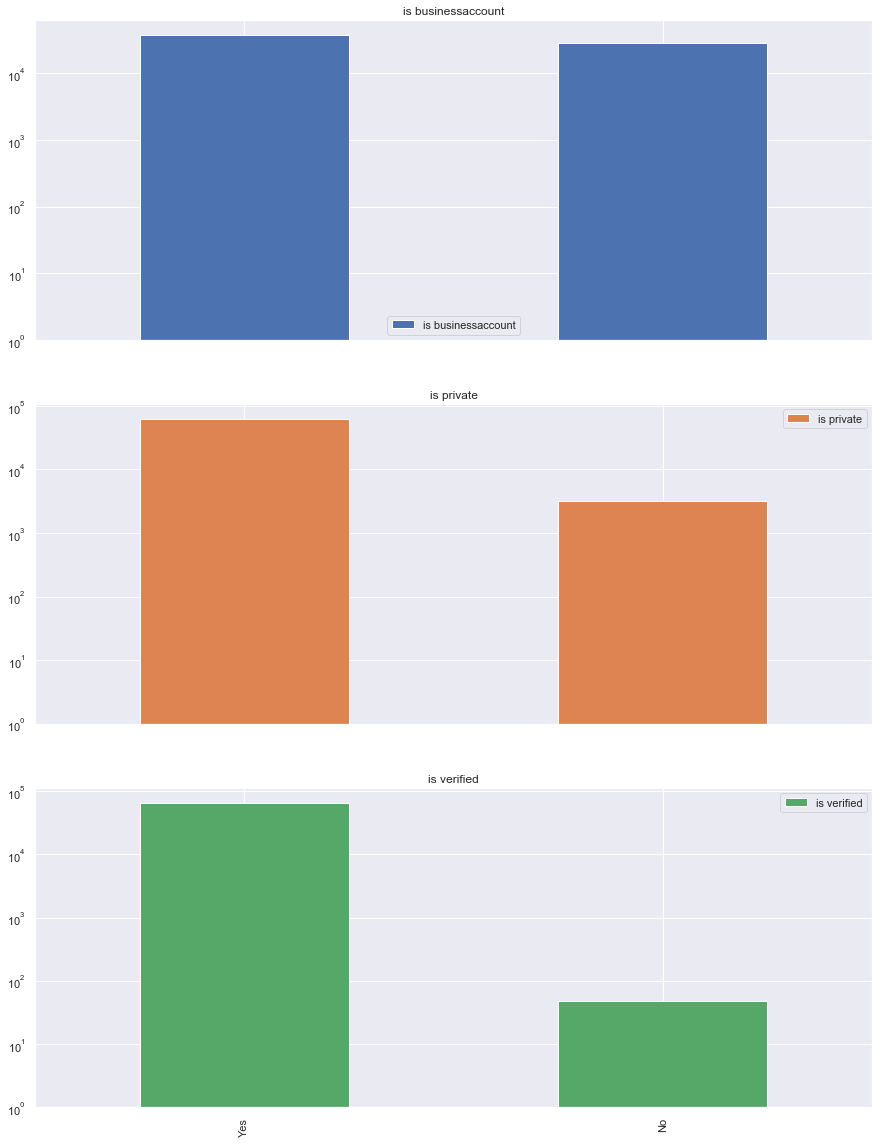

In [66]:
bar_chart = pd.DataFrame(stat, index=["Yes", "No"])

bar_chart.plot.bar(subplots=True, figsize=(15, 20), log=True)
plt.savefig('bar.png',dpi=400);

In [25]:
df['followedby'].describe()
overall_followers = df['followedby'].sum()
overall_followers
top_100 = df['followedby'].sort_values().tail(100).sum()

print("Top 100 profiles got %f%% of overall followers of 65K profiles" % (top_100/overall_followers*100))

count    6.500000e+04
mean     2.609873e+03
std      1.048457e+05
min      0.000000e+00
25%      1.400000e+02
50%      3.640000e+02
75%      8.470000e+02
max      2.626624e+07
Name: followedby, dtype: float64

169641739

Top 100 profiles got 37.315908% of overall followers of 65K profiles


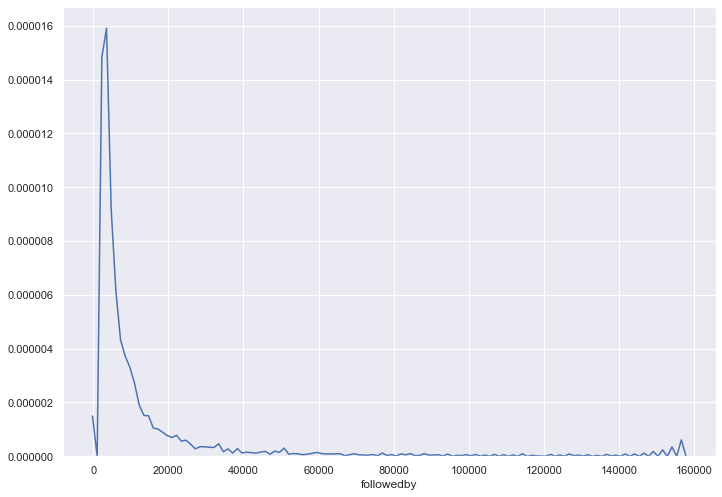

In [70]:
sns.distplot(df['followedby'].sort_values().head(64900), hist=False);
plt.savefig('followedby_dist.png',dpi=400);

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
df['follow'].describe()

count    65000.000000
mean       483.317754
std        870.182484
min          0.000000
25%        109.000000
50%        243.000000
75%        481.000000
max       7520.000000
Name: follow, dtype: float64

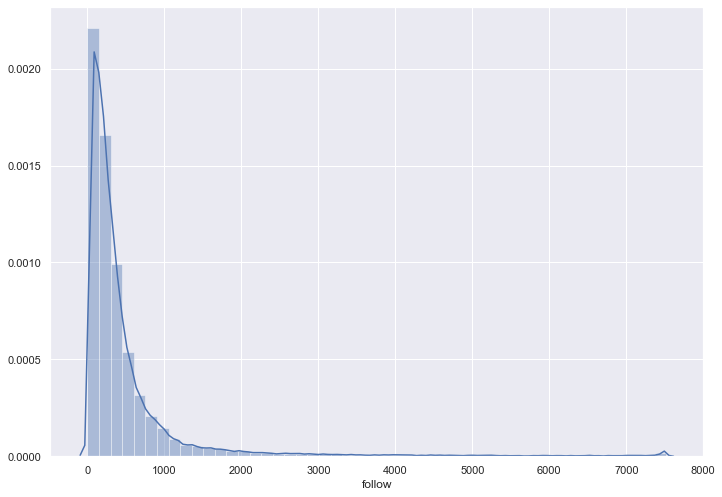

In [71]:
sns.distplot(df['follow'], hist=True);
plt.savefig('follow_dist.png',dpi=400);

In [42]:
followers_diff = (df['followedby'] - df['follow'])
followers_diff.describe()
followers_diff = followers_diff.sort_values().head(58500)
followers_diff.describe()

count    6.500000e+04
mean     2.126555e+03
std      1.048391e+05
min     -7.388000e+03
25%     -4.800000e+01
50%      4.600000e+01
75%      3.780000e+02
max      2.626458e+07
dtype: float64

count    58500.000000
mean        15.701504
std        703.213005
min      -7388.000000
25%        -65.000000
50%         24.000000
75%        221.000000
max       1613.000000
dtype: float64

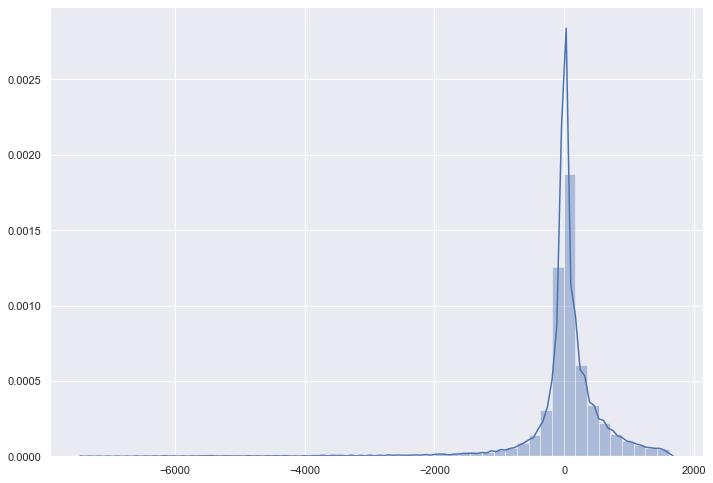

In [72]:
sns.distplot(followers_diff, hist=True);
plt.savefig('followers__diff_dist.png',dpi=400);

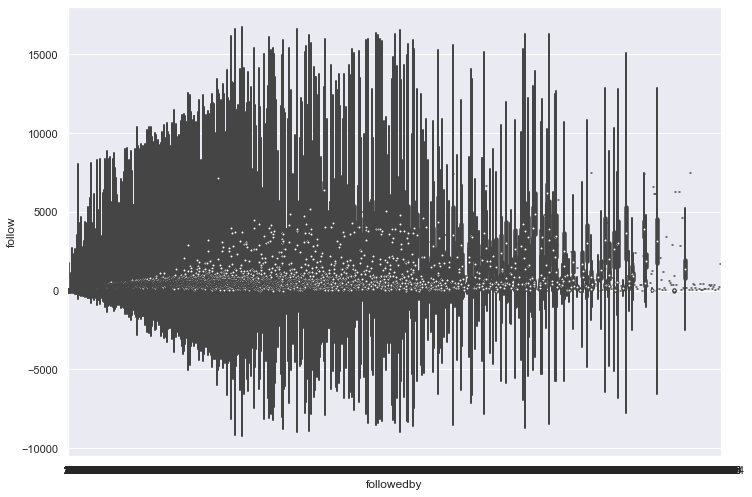

In [58]:
sns.violinplot(x="followedby", y="follow", data=df);